<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Heart_Diseases_Data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


1. Basic Cleaning

In [ ]:

missing_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_per_column)


print("Total missing values in all columns:", missing_per_column.sum())


missing_per_row = df.isnull().sum(axis=1)
print("Missing values per row:")
print(missing_per_row)


print("Total missing values in all rows:", missing_per_row.sum())


total_missing = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
Total missing values in all columns: 645
Missing values per row:
0       0
1       0
2       0
3       0
4       0
       ..
4233    0
4234    0
4235    1
4236    1
4237    0
Length: 4238, dtype: int64
Total missing values in all rows: 645
Total missing values in the dataset: 645


In [ ]:
# Replace missing values in numeric columns with the median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print(df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:

for col in df.columns:
    print(f"Unique values in column '{col}':")

    if df[col].nunique() < 20:
        print(df[col].unique())
    else:
        print(df[col].value_counts().head())
    print("-" * 20)

Unique values in column 'male':
[1 0]
--------------------
Unique values in column 'age':
age
40    191
46    182
42    180
41    174
48    173
Name: count, dtype: int64
--------------------
Unique values in column 'education':
[4. 2. 1. 3.]
--------------------
Unique values in column 'currentSmoker':
[0 1]
--------------------
Unique values in column 'cigsPerDay':
cigsPerDay
0.0     2173
20.0     734
30.0     217
15.0     210
10.0     143
Name: count, dtype: int64
--------------------
Unique values in column 'BPMeds':
[0. 1.]
--------------------
Unique values in column 'prevalentStroke':
[0 1]
--------------------
Unique values in column 'prevalentHyp':
[0 1]
--------------------
Unique values in column 'diabetes':
[0 1]
--------------------
Unique values in column 'totChol':
totChol
234.0    90
240.0    85
220.0    70
260.0    62
210.0    61
Name: count, dtype: int64
--------------------
Unique values in column 'sysBP':
sysBP
120.0    107
130.0    102
110.0     96
115.0     89
125.

2. Feature Visualization

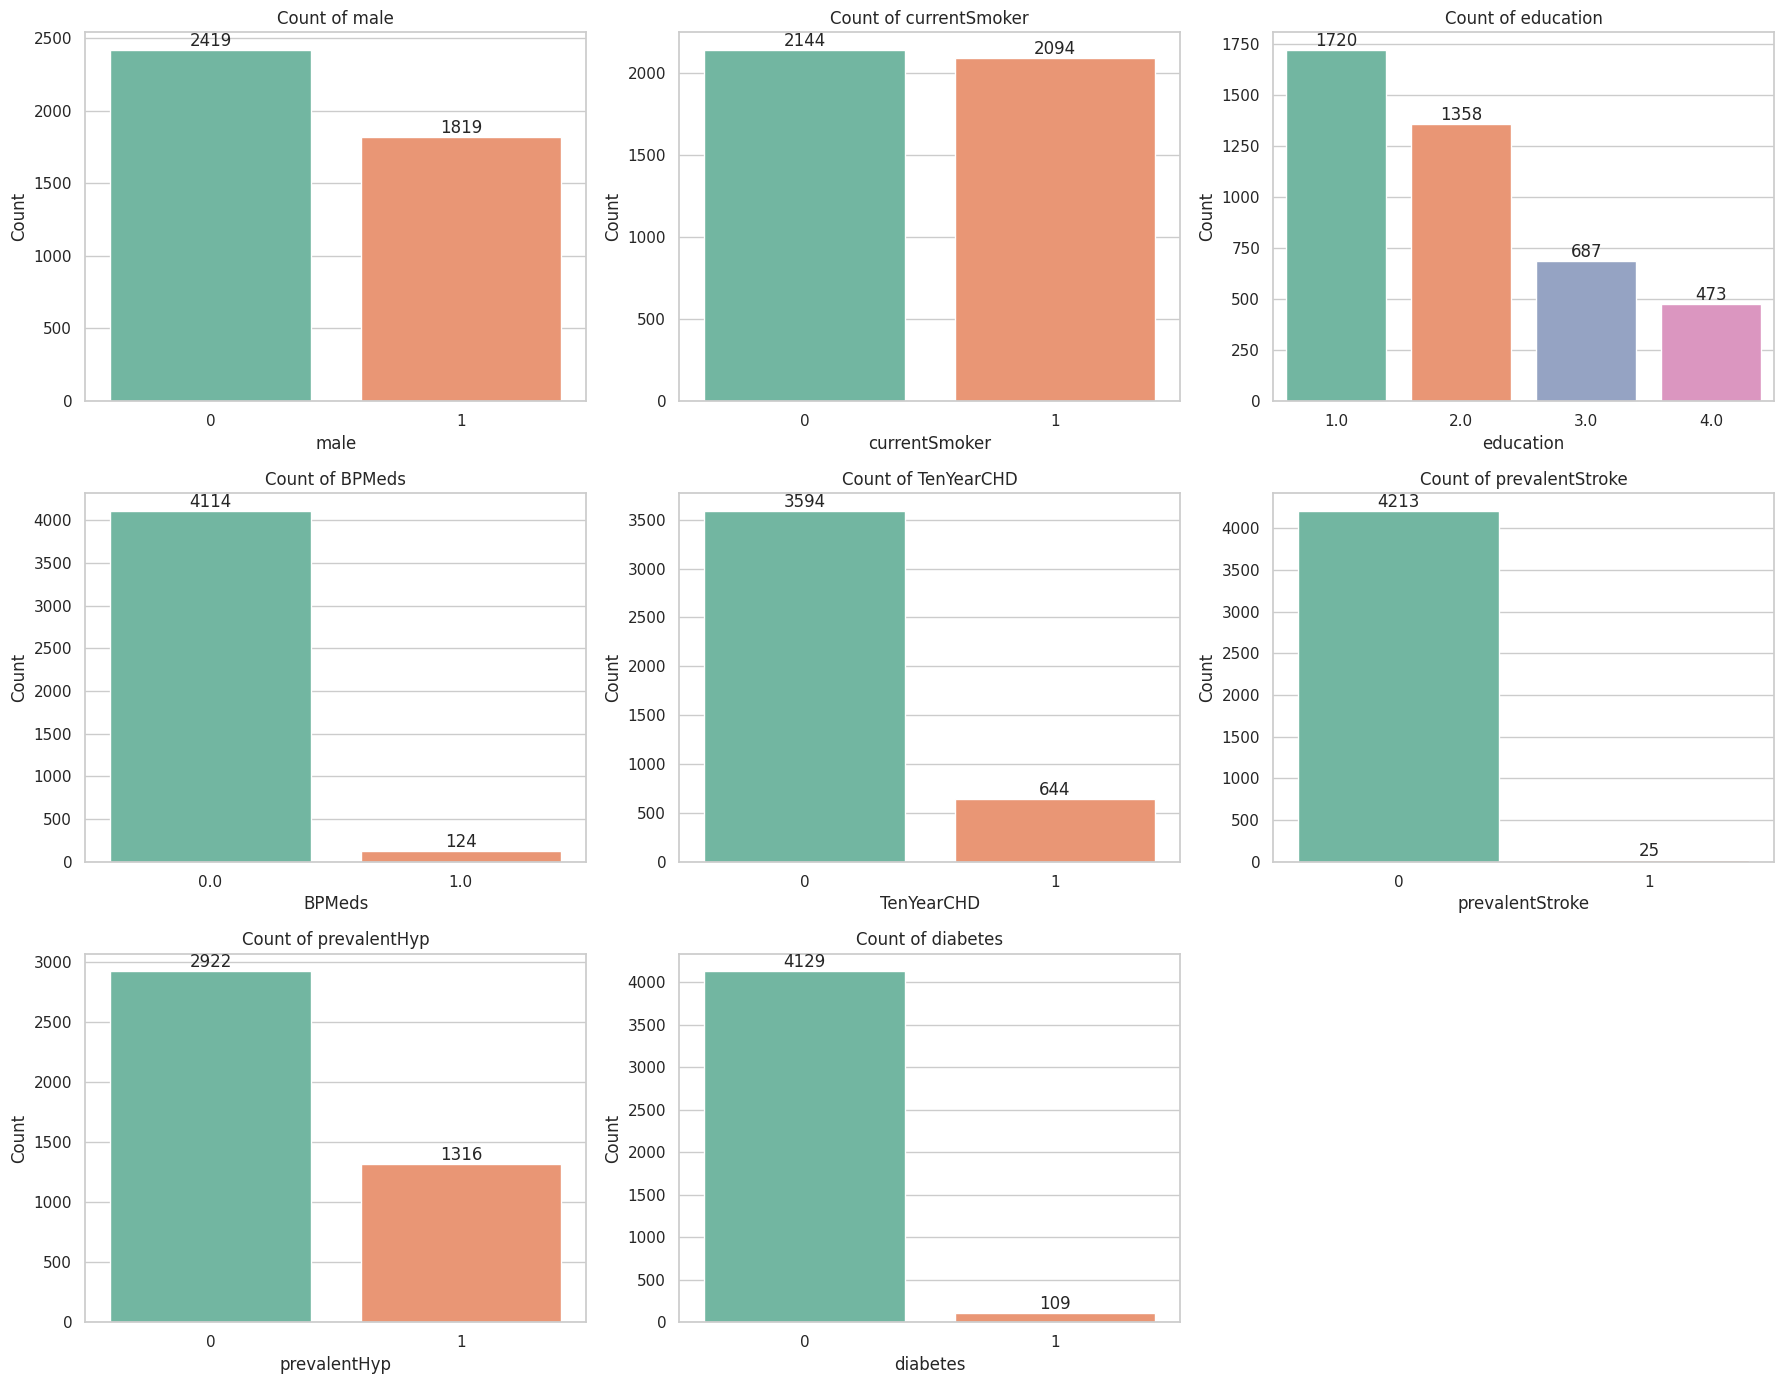

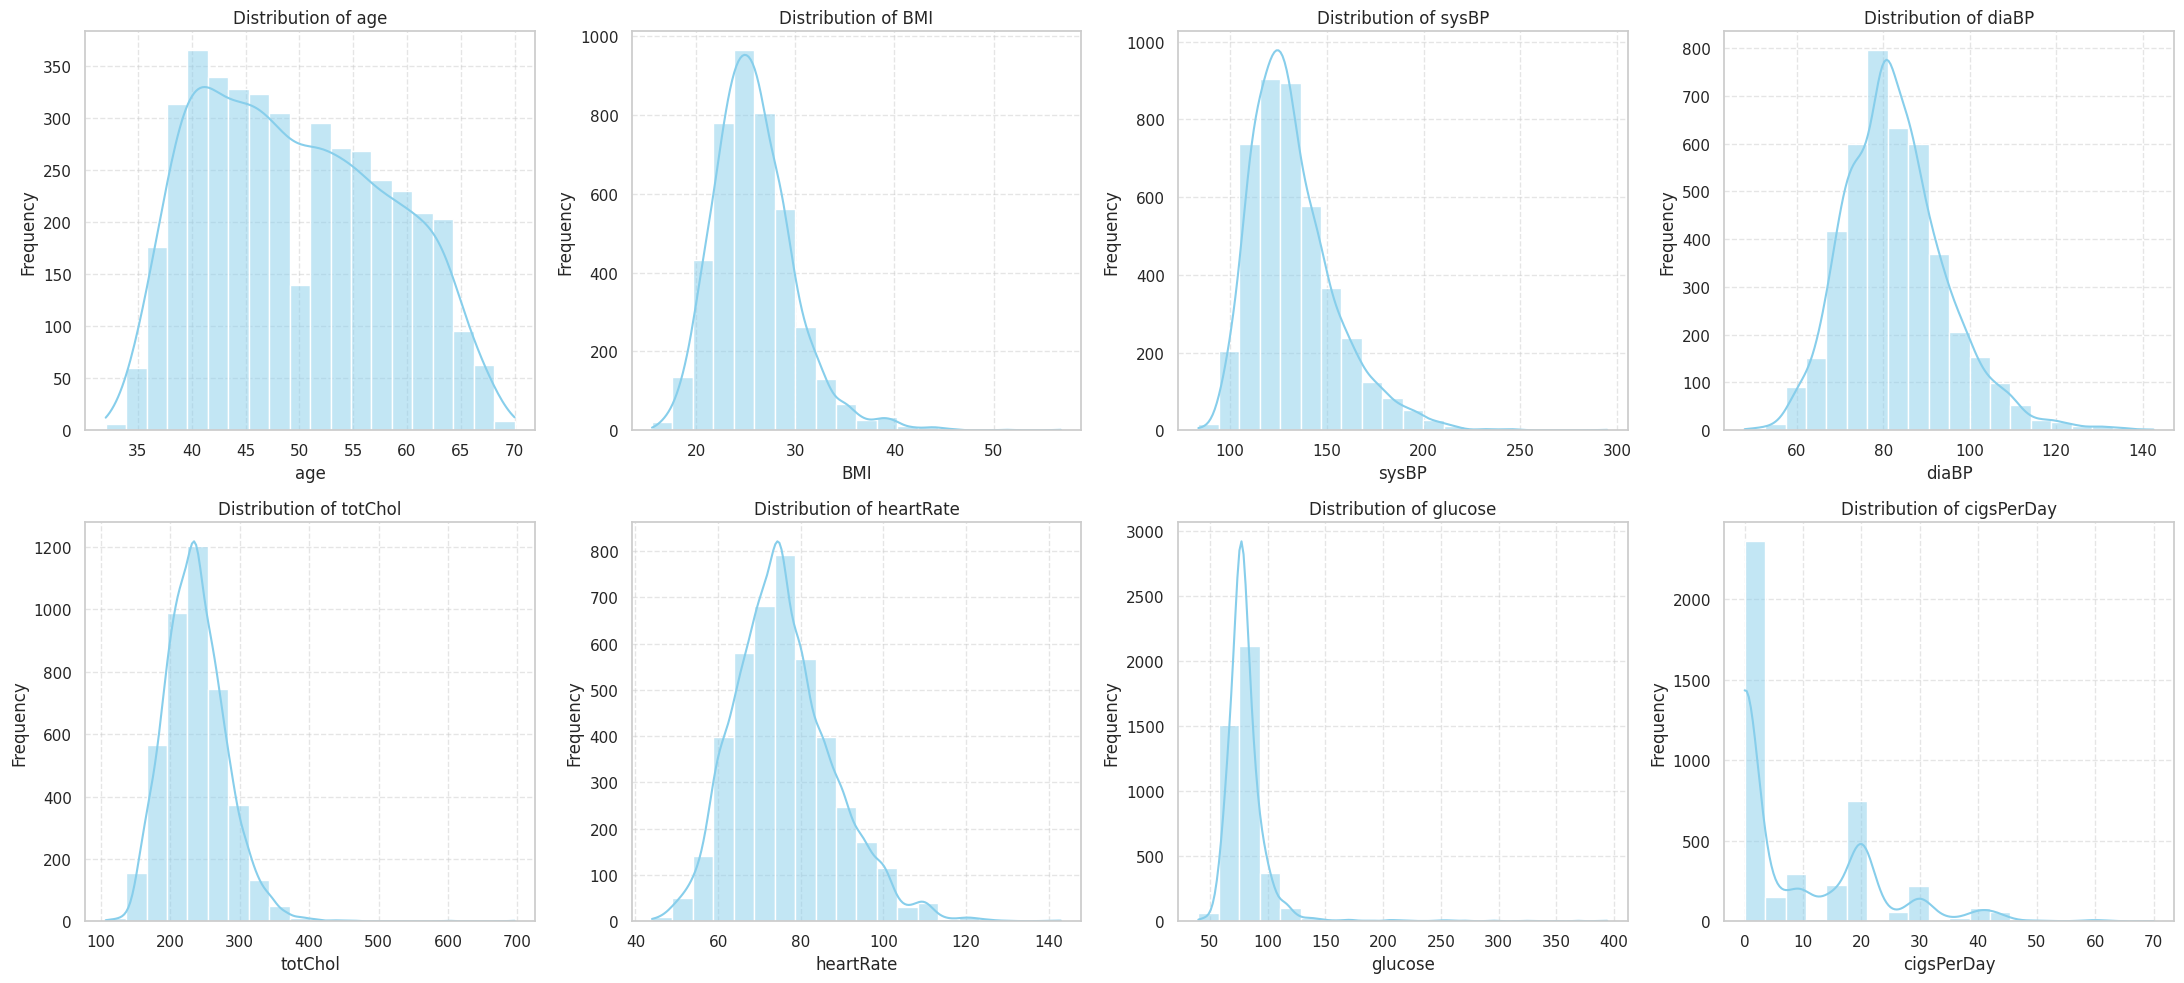

In [ ]:
sns.set(style="whitegrid")


categorical_cols = [
    'male', 'currentSmoker', 'education', 'BPMeds', 'TenYearCHD',
    'prevalentStroke', 'prevalentHyp', 'diabetes'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    order = df[col].value_counts().index if df[col].nunique() < 10 else sorted(df[col].unique())
    ax = axes[i]

    sns.countplot(data=df, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    if df[col].nunique() > 5:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


numerical_cols = [
    'age', 'BMI', 'sysBP', 'diaBP', 'totChol', 'heartRate', 'glucose', 'cigsPerDay'
]

fig, axes = plt.subplots(2, 4, figsize=(22, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations:**  
- `BPMeds` has 97% of entries indicating **no medication**, showing low variance.  
- `prevalentStroke` and `diabities` show very few positive cases, indicating skewed distribution.  
- Other features are relatively balanced and do not require removal.


In [ ]:
# Drop columns BPMeds, prevalentStroke, and diabetes
df = df.drop(['BPMeds', 'prevalentStroke', 'diabetes'], axis=1)
df.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
prevalentHyp,int64
totChol,float64
sysBP,float64
diaBP,float64
BMI,float64


3. Spearman or Pearson Correlation

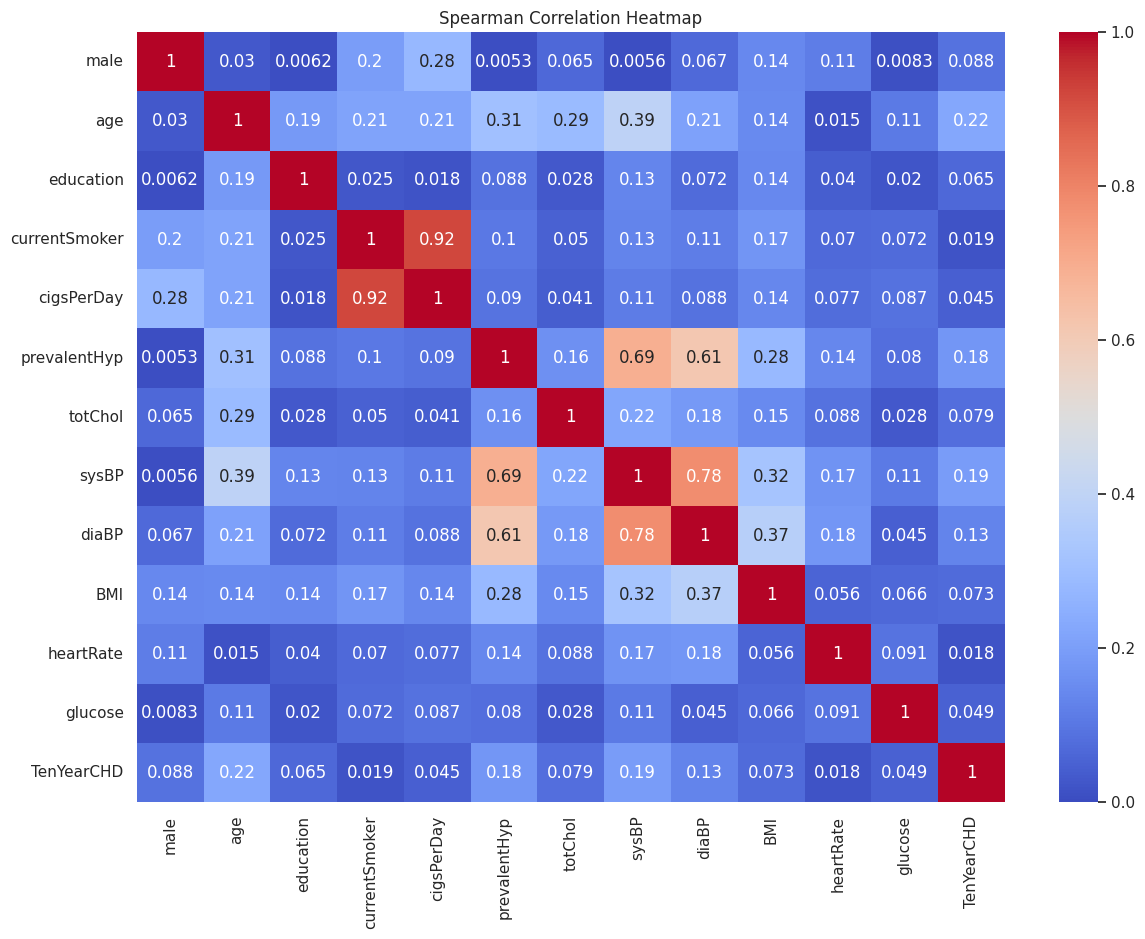

In [ ]:
corr_matrix = df.corr('spearman').abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Spearman| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Spearman| > 0.8):
cigsPerDay and currentSmoker: correlation = 0.92


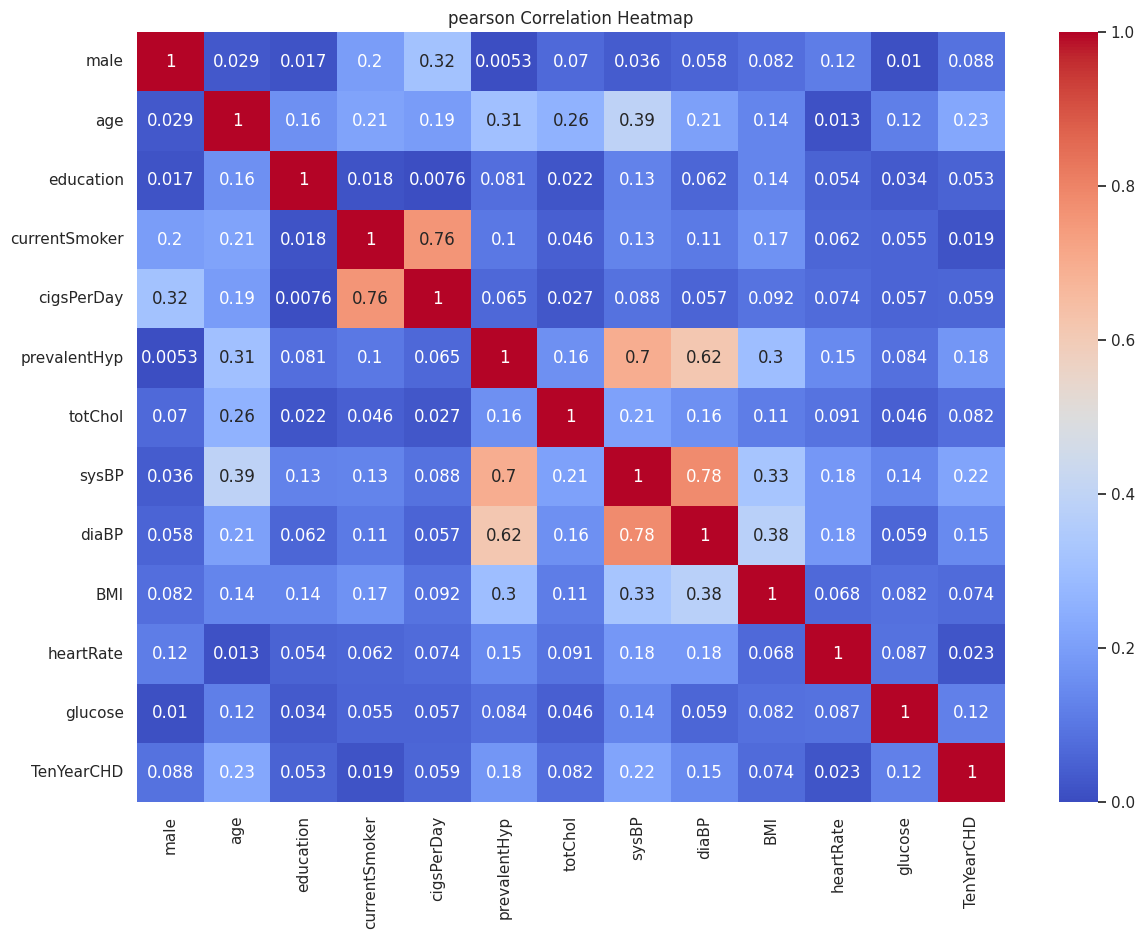

In [ ]:
corr_matrix = df.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("pearson Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Pearson| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Pearson| > 0.8):


Besides currentSmoker & cigsPerDay, no other feature pair is above the typical thresholds (0.8 or 0.9) for multicollinearity.

In [ ]:

numerical_df = df.select_dtypes(include=np.number)
variances = numerical_df.var()
print("Feature Variances:")
display(variances)

# Set a variance threshold (you can adjust this value)
variance_threshold = 0.01


low_variance_numerical_features = variances[variances < variance_threshold].index.tolist()

print(f"\nNumerical features with variance below {variance_threshold}:")
print(low_variance_numerical_features)

# Drop low variance features from the original DataFrame
if low_variance_numerical_features:
    df = df.drop(columns=low_variance_numerical_features)
    print(f"\nDropped low variance numerical columns: {low_variance_numerical_features}")
else:
    print("\nNo numerical features found with variance below the threshold.")


display(df.info())

Feature Variances:


,0
male,0.245047
age,73.481926
education,1.014211
currentSmoker,0.250024
cigsPerDay,141.667096
prevalentHyp,0.214149
totChol,1964.920781
sysBP,485.677704
diaBP,141.868338
BMI,16.573376



Numerical features with variance below 0.01:
[]

No numerical features found with variance below the threshold.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4238 non-null   int64  
 1   age            4238 non-null   int64  
 2   education      4238 non-null   float64
 3   currentSmoker  4238 non-null   int64  
 4   cigsPerDay     4238 non-null   float64
 5   prevalentHyp   4238 non-null   int64  
 6   totChol        4238 non-null   float64
 7   sysBP          4238 non-null   float64
 8   diaBP          4238 non-null   float64
 9   BMI            4238 non-null   float64
 10  heartRate      4238 non-null   float64
 11  glucose        4238 non-null   float64
 12  TenYearCHD     4238 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.6 KB


None

In [ ]:

df= df.drop(['currentSmoker'], axis=1)
df.head()

,male,age,education,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.to_csv("Processed_Heart_Diseases_Data.csv", index=False)